For this project we'll be using pandas plotting functionality along with Jupyter notebook interface to explore data quickly through visualizations.

The goal is to demonstrate data visualization techniques by analyzing job success outcomes of students who graduated from college between 2010 and 2012. The original data of on the job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. The website FiveThirtyEight cleaned the dataset and released it on their [GitHub repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median, salaries, and more. Below lists some information provided in the data dictionary: 

* `Rank` - Rank by median earnings (the dataset is ordered by this column)
* `Major_code` - Major code
* `Major` - Major description
* `Major_categor` - Category of major 
* `Total` - Total number of people with major
* `Sample_size` - Sample size (unweighted) of full-time
* `Men` - Male graduates
* `Women` - Female graduates
* `ShareWomen` - Women as share of total
* `Employed` - Number employed
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs
* `Full_time` - Number employed 35 hours or more
* `Part_time` - Number employed less than 35 hours

Using visualizations, we will explore the following questions from the dataset:

* Do students in more popular majors make more money?
    * Using scatter plots
* How many majors are predominantly male? Predominantly female?
    * Using histograms
* Which category of majors have the most students?
    * Using bar plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')

# Initial Dataset Exploration

In [3]:
display(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
display(recent_grads.head())

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
display(recent_grads.tail())

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


### Dropping Missing Values

In [7]:
raw_data_count = len(recent_grads)
print(raw_data_count)

173


In [8]:
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)
print(cleaned_data_count)

172


* Only one row contained missing values

# Exploring Differences Between Majors: Scatter Plots

Questions:
* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more money?
* Is there a link between the number of full-time employees and median salary?

### Popular Majors

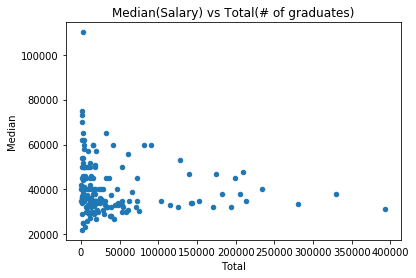

In [21]:
recent_grads.plot(x='Total', y='Median', kind='scatter', title = "Median(Salary) vs Total(# of graduates)")

The above scatter plot shows that there is not a strong correlation between popularity of a major and median salary of full time workers. A surprising data point actually shows that the most popular major has a median salary of full time workers that is in the low end around 36,000. We should keep in mind that this dataset was collected from 2010 to 2012 and salaries reflected may be slightly higher if the dataset were collected today. Lets take a closer look at the top five majors and the median salaries associated with them. 

In [28]:
top_5_majors= recent_grads.sort_values(['Total'], ascending = False).head()

In [29]:
top_5_majors

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,...,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
123,124,3600,BIOLOGY,280709.0,111762.0,168947.0,Biology & Life Science,0.601858,1370,182295,...,72371,100336,13874,0.070725,33400,24000,45000,88232,81109,28339
57,58,6200,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,...,36241,138299,14946,0.072861,40000,30000,55000,29334,100831,27320
93,94,1901,COMMUNICATIONS,213996.0,70619.0,143377.0,Communications & Journalism,0.669999,2394,179633,...,49889,116251,14602,0.075177,35000,27000,45000,40763,97964,27440


We can see from the above DataFrame the top five majors and the salaries associated with full time workers are:
* `Psychology` : 31,500
* `Business Admin`: 38,000
* `Biology`: 33,400
* `Business`: 40,000
* `Communications`: 35,000

The average salary of the top 5 majors is `35,590`.

In [34]:
avg_salary_top_5 = top_5_majors['Median'].mean()
print(avg_salary_top_5)

35580.0


We'll compare this with the bottom 5 least popular majors below:

In [31]:
bottom_5_majors = recent_grads.sort_values(['Total']).head()
display(bottom_5_majors)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,...,0,111,0,0.000000,40000,40000,40000,0,0,0
52,53,4005,MATHEMATICS AND COMPUTER SCIENCE,609.0,500.0,109.0,Computers & Mathematics,0.178982,7,559,...,0,391,0,0.000000,42000,30000,78000,452,67,25
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.305109,4,613,...,185,383,0,0.000000,35000,18500,44000,355,144,0
33,34,2411,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,720.0,488.0,232.0,Engineering,0.322222,5,604,...,126,396,49,0.075038,50000,42800,57000,501,50,49
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50


In [ ]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title = "Unemployment Rate vs Sample Size")

The 5 least popular college majors and the salaries associated with them are:
* `Military Technologies`: 40,000
* `Mathematics and Computer Science`: 78,000
* `Soil Science`: 35000
* `Geological and Geophysical Engineering`: 50,000
* `Mining and Mineral Engineering`: 90,000

### Bar Charts: Popular/Unpopular Majors

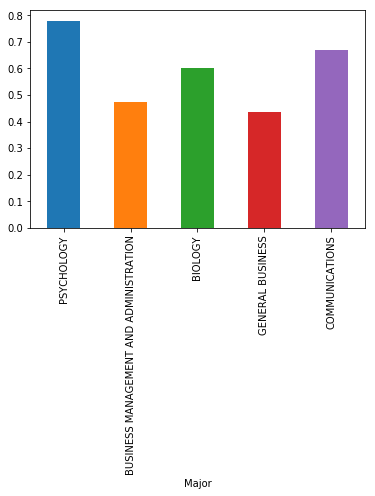

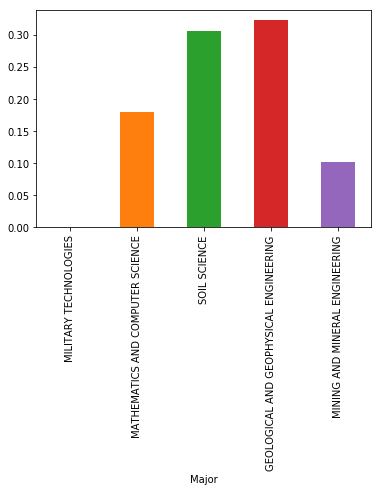

In [82]:
top_5_majors.plot.bar(x='Major', y='ShareWomen', legend=False)
bottom_5_majors.plot.bar(x='Major', y='ShareWomen', legend=False)

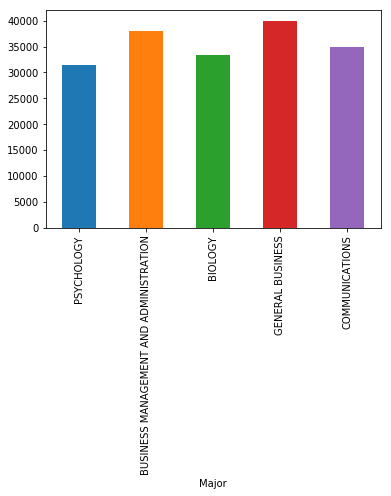

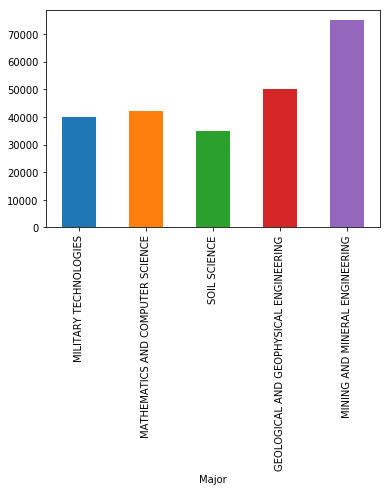

In [83]:
top_5_majors.plot.bar(x='Major', y='Median', legend=False)
bottom_5_majors.plot.bar(x='Major', y='Median', legend=False)

The average salary of the 5 least popular majors is `48,400`, about 13,000 more than the top 5 most popular majors. This could mean that there is more competition in the employment marketplace for these employees as a result of fewer graduates. These majors could also include skills that are difficult to master making them valuable as well as resulting in less graduates. 

In [35]:
avg_salary_bottom_5 = bottom_5_majors['Median'].mean()
print(avg_salary_bottom_5)

48400.0


### Majority Female Majors

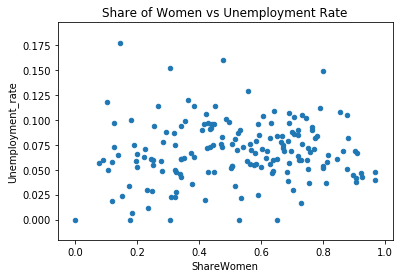

In [17]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Share of Women vs Unemployment Rate')

* No correlation between share of woman and unemployment rate

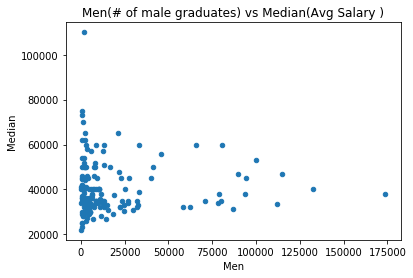

In [19]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men(# of male graduates) vs Median(Avg Salary )')

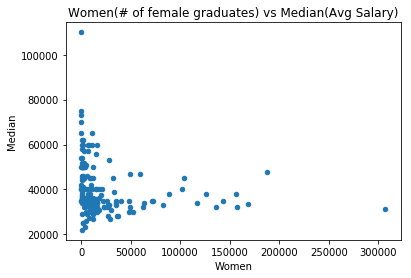

In [20]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women(# of female graduates) vs Median(Avg Salary)')

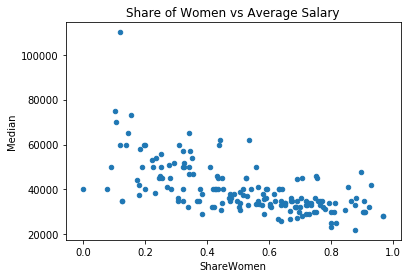

In [37]:
recent_grads.plot(x='ShareWomen', y='Median', kind = 'scatter', title ='Share of Women vs Average Salary')

We can see from the above chart that as the number of women in a college major increases the average salary of full time workers seems to decrease. This could mean the women are choosing majors that aren't as sought after by employers. Lets look at the top 10 majors with the biggest share of women:

In [41]:
top10_women = recent_grads.sort_values(['ShareWomen'], ascending = False).head(10)
display(top10_women)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
164,165,2307,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,Education,0.968954,342,32551,...,7001,20748,1360,0.040105,28000,21000,35000,23515,7705,2868
163,164,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.967998,95,29763,...,13862,14460,1487,0.047584,28000,20000,40000,19957,9404,5125
51,52,6104,MEDICAL ASSISTING SERVICES,11123.0,803.0,10320.0,Health,0.927807,67,9168,...,4107,4290,407,0.042507,42000,30000,65000,2091,6948,1270
138,139,2304,ELEMENTARY EDUCATION,170862.0,13029.0,157833.0,Education,0.923745,1629,149339,...,37965,86540,7297,0.046586,32000,23400,38000,108085,36972,11502
150,151,2901,FAMILY AND CONSUMER SCIENCES,58001.0,5166.0,52835.0,Industrial Arts & Consumer Services,0.910933,518,46624,...,15872,26906,3355,0.067128,30000,22900,40000,20985,20133,5248
100,101,2310,SPECIAL NEEDS EDUCATION,28739.0,2682.0,26057.0,Education,0.906677,246,24639,...,5153,16642,1067,0.041508,35000,32000,42000,20185,3797,1179
156,157,5403,HUMAN SERVICES AND COMMUNITY ORGANIZATION,9374.0,885.0,8489.0,Psychology & Social Work,0.905590,89,8294,...,2405,5061,326,0.037819,30000,24000,35000,2878,4595,724
151,152,5404,SOCIAL WORK,53552.0,5137.0,48415.0,Psychology & Social Work,0.904075,374,45038,...,13481,27588,3329,0.068828,30000,25000,35000,27449,14416,4344
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,40818,122817,8497,0.044863,48000,39000,58000,151643,26146,6193
88,89,6199,MISCELLANEOUS HEALTH MEDICAL PROFESSIONS,13386.0,1589.0,11797.0,Health,0.881294,81,10076,...,4145,5868,893,0.081411,36000,23000,42000,5652,3835,1422


### Full Time Employees vs Median Salaries

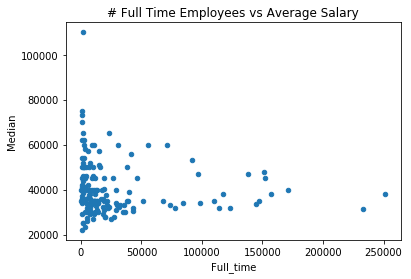

In [42]:
recent_grads.plot(x='Full_time', y='Median', kind='Scatter',title='# Full Time Employees vs Average Salary')

There is some correlation between the number of full time employees and average salaries. As average salary increases the number of full time employees decreases for some majors. There could be number of reason for this. Employers may only need a smaller number of highly skilled workers that are paid more.

# Exploring Column Distributions: Histograms

* What is the most common median salary range?
* What percent of majors are predominantly male? Predominantly female?

### Common Median Salary Range

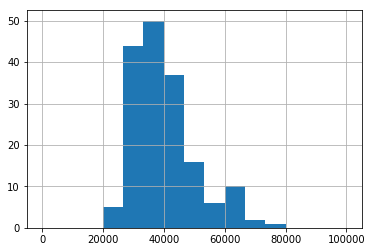

In [54]:
recent_grads['Median'].hist(bins=15, range=(0,100000))

The above histogram shows that the the most common median salary for recent graduates is in the 35,000 to 40,000 range.

### Male

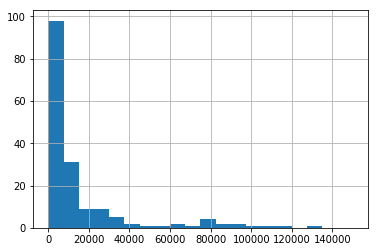

In [58]:
recent_grads['Men'].hist(bins = 20, range=(0,150000))

### Female

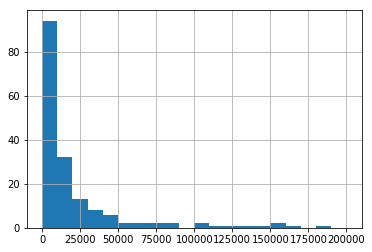

In [63]:
recent_grads['Women'].hist(bins = 20, range=(0,200000))

### Share Female

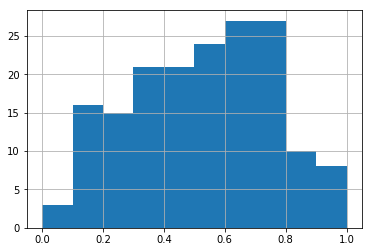

In [70]:
recent_grads['ShareWomen'].hist(bins = 10, range= (0,1))

The above histogram shows that a large percentage of college majors have a majority of female students graduating. We will compare plots to gain some more insight.

# Scatter Matrix Plot Comparison

In [72]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115e4da20>,
      dtype=object)

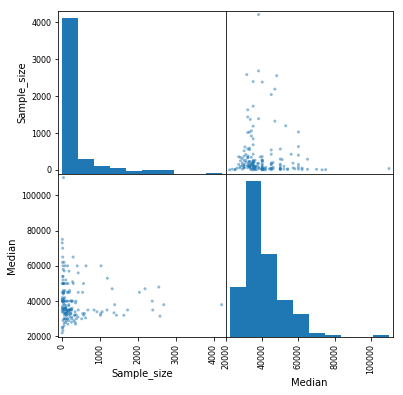

In [76]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1151e2940>,
      dtype=object)

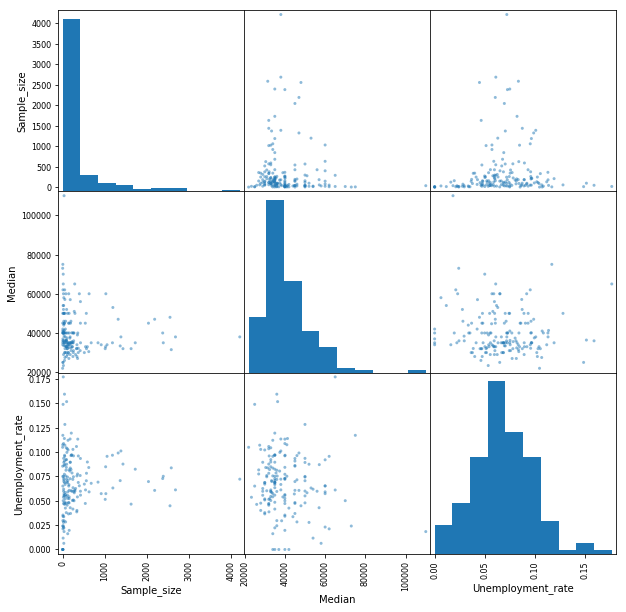

In [77]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115f82ac8>,
      dtype=object)

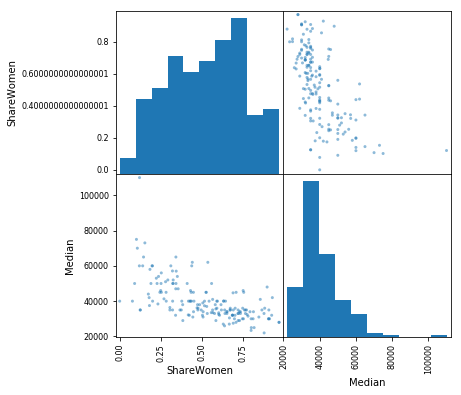

In [78]:
scatter_matrix(recent_grads[['ShareWomen', 'Median']], figsize=(6,6))

* Again we can see that as the percentage of woman in major decrease the median salary of full time workers increases.

# Conclusions

The goal of this project was to demonstrate some of pandas data visualization functionality through the analysis of college major data collected by American Community Survey and cleaned by the popular FiveThirtyEight website. We have demonstrated the use of scatter plots, bar charts, histograms, and scatter matrix visualizations. 

After analyzing the data we can clearly see the popular majors do not have job outcomes that include higher salaries. In fact the most popular major psychology has a low starting salary for graduates around 36,000. Furthermore woman make woman make up a large percent of the most popular majors with some negative correlation of share of women and median salary outcomes. 